In [1]:
# importing libraries for data pre processing
import pandas as pd
import numpy as np

In [2]:
# extracting data
data = pd.read_csv('TopGun_review.csv')

In [3]:
# overview of data
data.head()

,Unnamed: 0,rating,review,displayName,isVerified,isSuperReviewer,hasSpoilers,hasProfanity,score,timeFromCreation,user.displayName,user.accountLink,user.realm,user.userId,displayImageUrl
0,0,5.0,"Without a doubt the best 2022 movie, Never see...",Francisco Jose S,False,False,False,False,5.0,20m ago,Francisco Jose S,/user/id/Google_104552984062153435893,RT,Google_104552984062153435893,NaN
1,1,5.0,so much better than the first one.,Carol,True,False,False,False,5.0,35m ago,Carol,NaN,Fandango,C950C2F8-959A-4D81-BF68-9BD28533C4E9,NaN
2,2,5.0,Hands down the best movie of 2022,ruben,False,False,False,False,5.0,50m ago,ruben,/user/id/Google_105208587126559003207,RT,Google_105208587126559003207,NaN
3,3,5.0,The Best Movie of 2022.,Ahmed R,False,False,False,False,5.0,1h ago,Ahmed R,/user/id/Google_105057991775732297204,RT,Google_105057991775732297204,NaN
4,4,5.0,"Such an amazing movie, amazing story, amazing ...",Colin M,False,False,False,False,5.0,1h ago,Colin M,/user/id/Google_107611028930498126183,RT,Google_107611028930498126183,NaN


In [4]:
# finding numbers of reviews and features
shape = data.shape
print('Number of Reviews : ',shape[0])
print('Number of Reviews : ',(shape[1]-1))

Number of Reviews :  5010
Number of Reviews :  14


In [5]:
# overview of columns
print('Features :',data.columns)

Features : Index(['Unnamed: 0', 'rating', 'review', 'displayName', 'isVerified',
       'isSuperReviewer', 'hasSpoilers', 'hasProfanity', 'score',
       'timeFromCreation', 'user.displayName', 'user.accountLink',
       'user.realm', 'user.userId', 'displayImageUrl'],
      dtype='object')


In [6]:
# lets drop unwanted columns
data.drop(['Unnamed: 0', 'displayName', 'isVerified',
       'isSuperReviewer', 'hasSpoilers', 'hasProfanity', 'score',
       'timeFromCreation', 'user.displayName', 'user.accountLink',
       'user.realm', 'user.userId','displayImageUrl'],axis = 1,inplace = True)

In [7]:
# overview of data after dropping columns
data.head()


,rating,review
0,5.0,"Without a doubt the best 2022 movie, Never see..."
1,5.0,so much better than the first one.
2,5.0,Hands down the best movie of 2022
3,5.0,The Best Movie of 2022.
4,5.0,"Such an amazing movie, amazing story, amazing ..."


In [8]:
# finding if there any null values
pd.isnull(data).values.any()

False

### There are no missing values in dataset.

<AxesSubplot:>

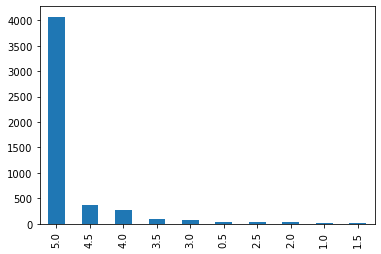

In [9]:
# plotting rating count
data['rating'].value_counts().plot(kind='bar')

In [10]:
# convert raings into positive and negative
data['rating'] = np.where(data['rating']>3 , 'Positive','Negative')

In [11]:
data.head(2)

,rating,review
0,Positive,"Without a doubt the best 2022 movie, Never see..."
1,Positive,so much better than the first one.


In [12]:
# plotting rating count
count = data['rating'].value_counts()
print('Percentage of Positive reviews', round((count['Positive']/(count['Positive']+count['Negative'])*100),2))
print('Percentage of Positive reviews', round((count['Negative']/(count['Positive']+count['Negative'])*100),2))

Percentage of Positive reviews 96.25
Percentage of Positive reviews 3.75


### Data is imbalanced dataset with majority positive reviews

## Data Analysis

In [13]:
!pip install wordcloud

In [14]:
# Python program to generate WordCloud
# importing all necessary modules
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

def word_cloud(data):
  comment_words = ''
  for val in data.review:    
    # typecaste each val to string
    val = str(val)
    # split the value
    tokens = val.split() 
    comment_words += " ".join(tokens)+" "
  wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
  plt.figure(figsize = (8, 8), facecolor = None)
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout(pad = 0)
 
  plt.show()

In [15]:
data_pos = data[data['rating'] == 'Positive']
data_neg = data[data['rating'] == 'Negative']

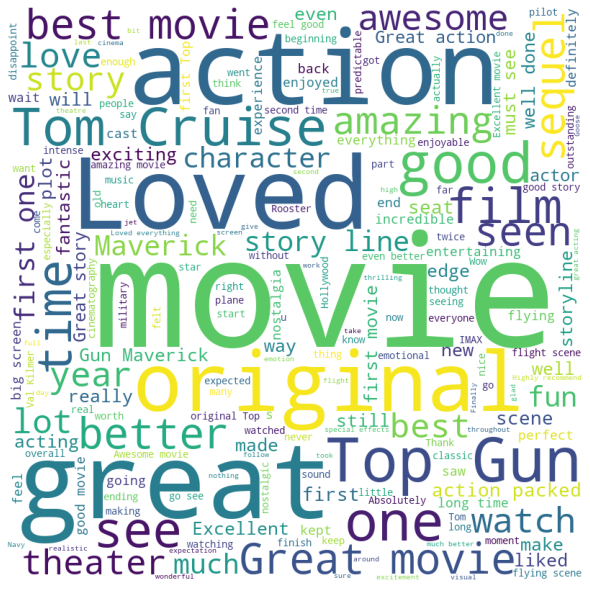

In [16]:
# finding a most common words in positive review
word_cloud(data_pos)

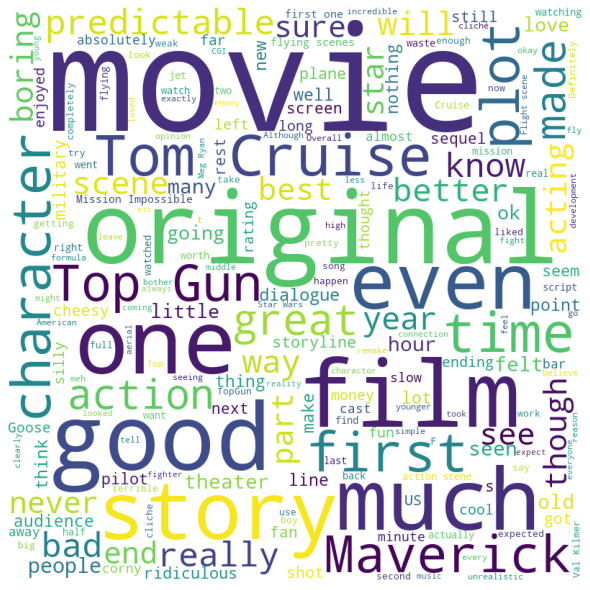

In [17]:
# finding a most common words in negative review
word_cloud(data_neg)

In [18]:
# lets add one more column review len in dataset
data['rev_len'] = data['review'].apply(lambda x: len(x))


In [19]:
data.head(5)

,rating,review,rev_len
0,Positive,"Without a doubt the best 2022 movie, Never see...",222
1,Positive,so much better than the first one.,34
2,Positive,Hands down the best movie of 2022,33
3,Positive,The Best Movie of 2022.,23
4,Positive,"Such an amazing movie, amazing story, amazing ...",211


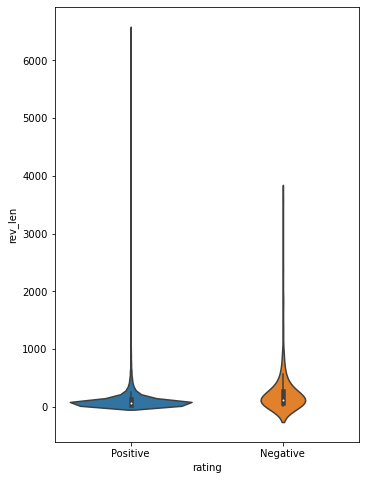

In [20]:
import seaborn as sns
plt.figure(figsize=(12, 8))

plt.subplot(1,2,1)
sns.violinplot(x = 'rating', y = 'rev_len', data = data[0:])

plt.show()



### Here we can see positive reviews are shorter in length as compared to negative reviews.

## Data Pre-processing

In [21]:
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [22]:
# we are removing the words from the stop words list: 'no', 'nor', 'not'
# <br /><br /> ==> after the above steps, we are getting "br br"
# we are including them into stop words list
# instead of <br /> if we have <br/> these tags would have revmoved in the 1st step

stopwords= set(['br', 'the', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"])

In [23]:
from bs4 import BeautifulSoup
from tqdm import tqdm
def preprocess_text(text_data):
    preprocessed_text = []
    # tqdm is for printing the status bar
    for sentance in tqdm(text_data):
        sent = re.sub(r"http\S+", "", sentance)
        sent = BeautifulSoup(sentance, 'lxml').get_text()
        sent = decontracted(sentance)
        sent = re.sub("\S*\d\S*", "", sentance).strip()
        sent = re.sub('[^A-Za-z]+', ' ', sentance)
        sent = decontracted(sentance)
        sent = sent.replace('\\r', ' ')
        sent = sent.replace('\\n', ' ')
        sent = sent.replace('\\"', ' ')
        sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
        # https://gist.github.com/sebleier/554280
        sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
        preprocessed_text.append(sent.lower().strip())
    return preprocessed_text

In [24]:
data['review'] = preprocess_text(data['review'].values)

100%|████████████████████████████████████████████████████████████████████████████| 5010/5010 [00:01<00:00, 3345.95it/s]


In [25]:
data.head(2)

,rating,review,rev_len
0,Positive,without doubt best 2022 movie never seen movie...,222
1,Positive,much better first one,34


In [26]:
# lets dump this preprocessed data frame into pickle file
data.to_pickle("data_final")